# Thompson Sampling<hr>

In [25]:
# importing dataset

import pandas as pd

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementing Thompson Sampling

In [26]:
from random import betavariate
N = len(dataset) # Total records
d = len(dataset.values[0]) # No. of columns
ads_selected=[]
rewards_1 = [0]*d
rewards_0 = [0]*d
total = 0

In [27]:
for n in range(N):
    ad = 0
    max_random=0
    for i in range(d):
        random_beta = betavariate(rewards_1[i]+1,rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if reward==1:
        rewards_1[ad]+=1
    else:
        rewards_0[ad]+=1
    total+=reward

print(total)

2603


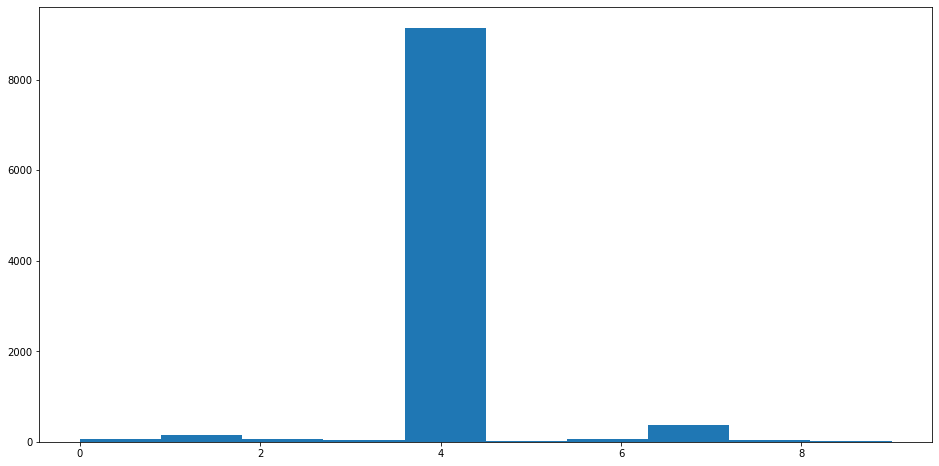

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize']=(16,8)
plt.hist(ads_selected)
plt.show()